# Gain calculation for sample of nights, r- and z-band. Using ~10 pairs per night

$G = \dfrac{(<F_1> + <F_2>) - (<B_1> + <B_2>)}{(std(F_{1} - F_{2})^2 - std(B_{1} - B_{2})^2)}$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import seaborn as sns
%matplotlib notebook

Load the values for gain obatained from header 

In [2]:
hdr = pd.read_csv('header_info_tab.csv')

Load the values obtained from the calculation

In [3]:
# calc = pd.read_csv('calc_gain_perAmp.csv')
calc = pd.read_csv('gainAmp_20180815t1003.csv')

List of available bands per night

In [4]:
calc['band'].unique()

array(['z', 'r', 'Y', 'i', 'VR', 'g', 'u'], dtype=object)

Plotting the amount of bands per night

In [5]:
n_band_nite = calc[['nite', 'band']].groupby(['nite']).band.nunique()

<IPython.core.display.Javascript object>


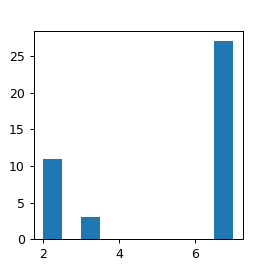

(array([11.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 27.]),
 array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ]),
 <a list of 10 Patch objects>)

In [6]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.hist(n_band_nite)

For consistency we'll use only z and r bands

In [7]:
calc = calc.loc[(calc['band'] == 'r') | (calc['band'] == 'z')]

Add new columns to calculation table, for Gain for Amp A and B as listed in the header

In [8]:
tmp_h = hdr.loc[hdr['ftype'] == 'dflat', ['ccd', 'ga', 'gb']].drop_duplicates(subset='ccd')
line = []
for idx, row in tmp_h.iterrows():
    line.append([row['ccd'], 'A', row['ga']])
    line.append([row['ccd'], 'B', row['gb']])
gain_hdr = pd.DataFrame(line, columns=['ccd', 'amp', 'gain'])

Samples per data frame

In [9]:
gain_hdr[:3]

,ccd,amp,gain
0,5.0,A,4.085
1,5.0,B,4.240
2,59.0,A,3.959


In [10]:
calc[:3]

,nite,band,ccd,amp,gain
0,20180831,z,5,A,4.275430
1,20180831,z,5,B,4.463108
2,20180831,z,5,A,4.251466


Simplistic method to add a new column of the header values of gain

In [11]:
gain_hdr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 3 columns):
ccd     122 non-null float64
amp     122 non-null object
gain    122 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.9+ KB


In [12]:
calc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46238 entries, 0 to 101259
Data columns (total 5 columns):
nite    46238 non-null int64
band    46238 non-null object
ccd     46238 non-null int64
amp     46238 non-null object
gain    45859 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.1+ MB


In [13]:
calc['gain_header'] = np.ones_like(calc['gain'].values)
for idx, row in gain_hdr.iterrows():
    x_ccd, x_amp, x_gain = row['ccd'], row['amp'], row['gain']
    c1 = calc['ccd'] == x_ccd
    c2 = calc['amp'] == x_amp
    calc.loc[c1 & c2, 'gain_header'] = x_gain

In [14]:
calc['gain_ratio'] = calc['gain'] / calc['gain_header']

Plotting

Remember: wer are using several images per night, then we can create histograms per CCD, for each night

<IPython.core.display.Javascript object>


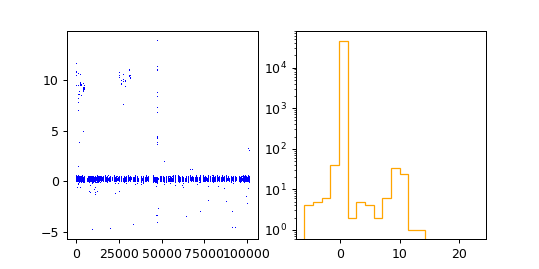

/Users/fco/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/fco/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [15]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
ax[0].plot(calc['gain'] - calc['gain_header'], 'b,')#, range=[0, 1], bins=10)
ax[1].hist(calc['gain'] - calc['gain_header'], range=[-6, 23], bins=20, histtype='step', color='orange')
ax[1].set_yscale('log')

In [16]:
calc[:3]

,nite,band,ccd,amp,gain,gain_header,gain_ratio
0,20180831,z,5,A,4.275430,4.085,1.046617
1,20180831,z,5,B,4.463108,4.240,1.052620
2,20180831,z,5,A,4.251466,4.085,1.040751


In [17]:
np.sort(calc['nite'].unique())

array([20180815, 20180816, 20180817, 20180818, 20180819, 20180828,
       20180829, 20180830, 20180831, 20180901, 20180902, 20180903,
       20180905, 20180906, 20180907, 20180908, 20180909, 20180910,
       20180911, 20180912, 20180913, 20180914, 20180915, 20180916,
       20180917, 20180918, 20180919, 20180920, 20180921, 20180922,
       20180923, 20180924, 20180925, 20180926, 20180927, 20180928,
       20180929, 20180930, 20181001, 20181002, 20181003])

Plot by subset of CCDs, befor/after 20180831

Before 20180831

<IPython.core.display.Javascript object>


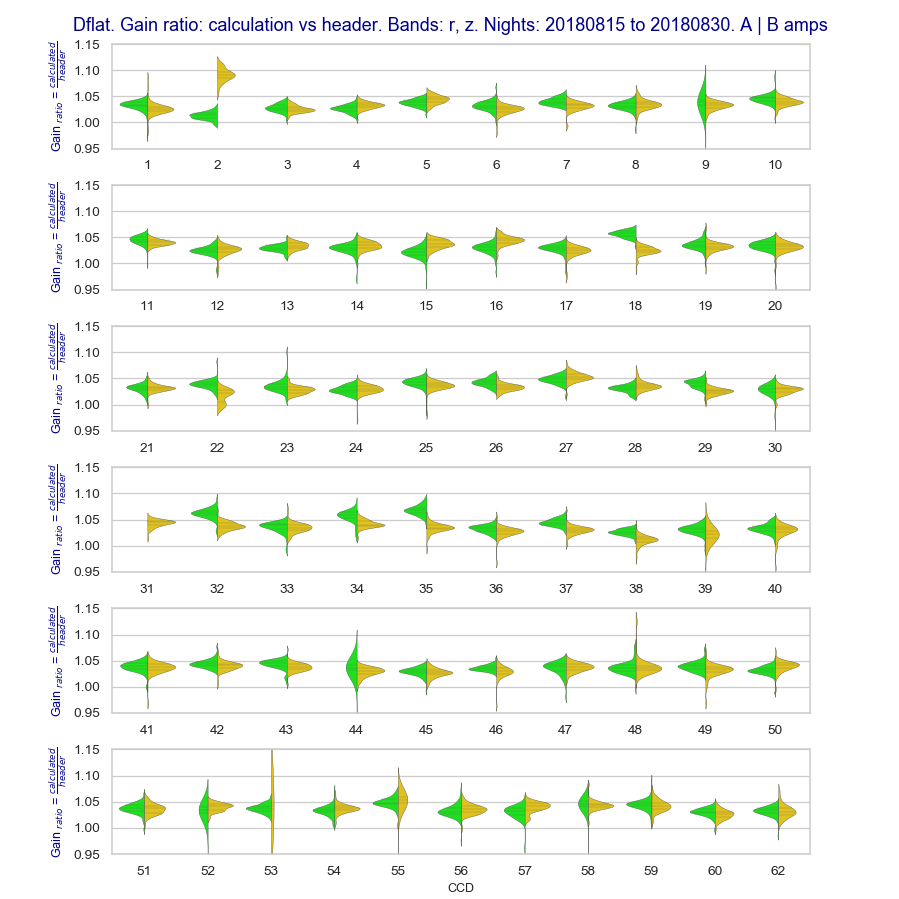

In [23]:
set1 = calc.loc[calc['nite'] < 20180831]

f, ax = plt.subplots(6, 1, figsize=(10, 10))
sns.set(style='whitegrid', palette='pastel', color_codes=True)

minorLocator = MultipleLocator(0.05)
kw1 = {
    'x': 'ccd', 
    'y': 'gain_ratio',                
    'hue': 'amp',
    'scale': 'area',
    'split': True, 
    'inner': 'quart',
    'linewidth': 0.3, 
    'palette': {'A': 'lime', 'B': 'gold'},  
}
    
plt.sca(ax[0])
sns.violinplot(data=set1.loc[set1['ccd'] <= 10], **kw1,)

plt.sca(ax[1])
sns.violinplot(data=set1.loc[(set1['ccd'] > 10) & (set1['ccd'] <= 20)], **kw1,)

plt.sca(ax[2])
sns.violinplot(data=set1.loc[(set1['ccd'] > 20) & (set1['ccd'] <= 30)], **kw1,)

plt.sca(ax[3])
sns.violinplot(data=set1.loc[(set1['ccd'] > 30) & (set1['ccd'] <= 40)], **kw1,)

plt.sca(ax[4])
sns.violinplot(data=set1.loc[(set1['ccd'] > 40) & (set1['ccd'] <= 50)], **kw1,)

plt.sca(ax[5])
sns.violinplot(data=set1.loc[(set1['ccd'] > 50)], **kw1,)

for axis in ax:
    axis.set_ylim([0.95, 1.15])
    # Remove legend
    axis.legend_.remove()
    axis.set_ylabel(r'Gain $_{ratio}$ = $\frac{calculated}{header}$', fontsize=10, color='darkblue')
    # Remove axis labels
    axis.xaxis.label.set_visible(False)
    # Set minor tics
    axis.yaxis.set_major_locator(minorLocator)


ax[-1].xaxis.label.set_visible(True)
ax[-1].set_xlabel('CCD', fontsize=10)

# Set title
t01 = r'Dflat. Gain ratio: calculation vs header. Bands: r, z.'
t01 += ' Nights: {0} to {1}. A | B amps'.format(set1['nite'].min(), set1['nite'].max())
plt.suptitle(t01, color='darkblue')

plt.subplots_adjust(hspace=0.35, top=0.95, bottom=0.05)

oname = 'gain_20180815t0830.pdf'
plt.savefig(oname, dpi=300, format='pdf')
#sns.despine(left=True)

Nights 20180831 to 20180905. Nights in between failures

<IPython.core.display.Javascript object>


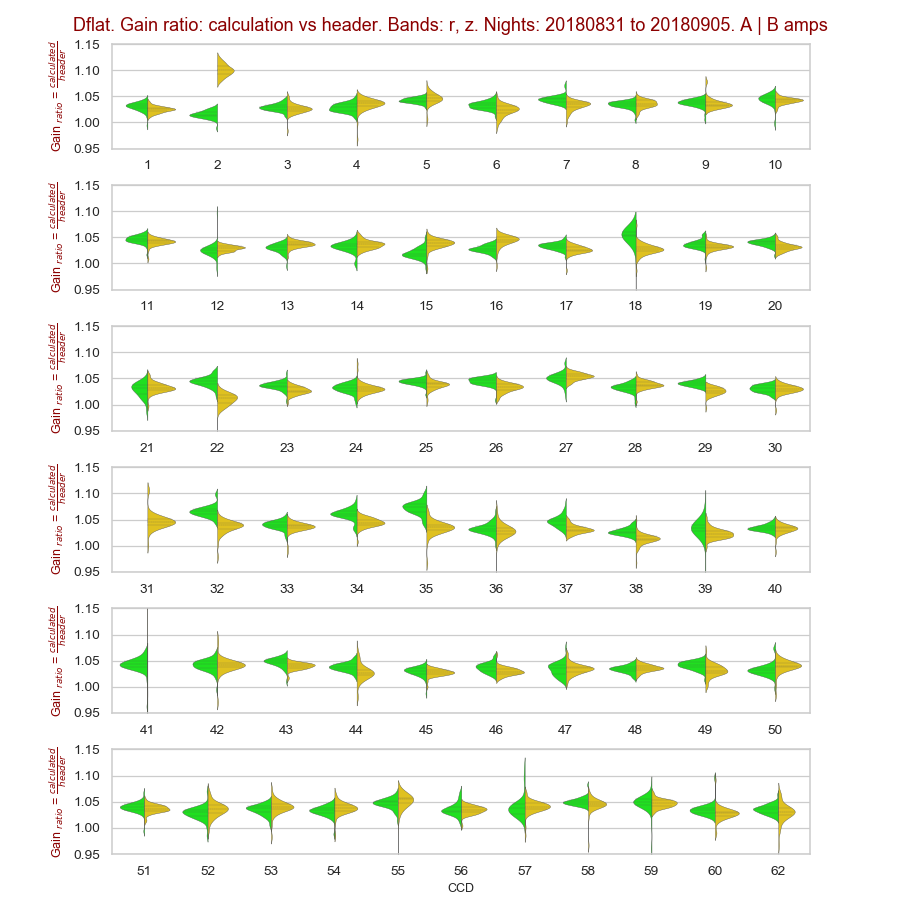

In [19]:
set1 = None
set1 = calc.loc[(calc['nite'] >= 20180831) & (calc['nite'] <= 20180905)]

f, ax = plt.subplots(6, 1, figsize=(10, 10))
sns.set(style='whitegrid', palette='pastel', color_codes=True)

minorLocator = MultipleLocator(0.05)
kw1 = {
    'x': 'ccd', 
    'y': 'gain_ratio',                
    'hue': 'amp',
    'scale': 'area',
    'split': True, 
    'inner': 'quart',
    'linewidth': 0.3, 
    'palette': {'A': 'lime', 'B': 'gold'},  
}
    
plt.sca(ax[0])
sns.violinplot(data=set1.loc[set1['ccd'] <= 10], **kw1,)

plt.sca(ax[1])
sns.violinplot(data=set1.loc[(set1['ccd'] > 10) & (set1['ccd'] <= 20)], **kw1,)

plt.sca(ax[2])
sns.violinplot(data=set1.loc[(set1['ccd'] > 20) & (set1['ccd'] <= 30)], **kw1,)

plt.sca(ax[3])
sns.violinplot(data=set1.loc[(set1['ccd'] > 30) & (set1['ccd'] <= 40)], **kw1,)

plt.sca(ax[4])
sns.violinplot(data=set1.loc[(set1['ccd'] > 40) & (set1['ccd'] <= 50)], **kw1,)

plt.sca(ax[5])
sns.violinplot(data=set1.loc[(set1['ccd'] > 50)], **kw1,)

for axis in ax:
    axis.set_ylim([0.95, 1.15])
    # Remove legend
    axis.legend_.remove()
    # Decrease fontsize
    # plt.setp(axis.get_legend().get_texts(), fontsize='8') # for legend text
    # plt.setp(axis.get_legend().get_title(), fontsize='8') # for legend title
    axis.set_ylabel(r'Gain $_{ratio}$ = $\frac{calculated}{header}$', fontsize=10, color='darkred')
    # Remove axis labels
    axis.xaxis.label.set_visible(False)
    # Set minor tics
    axis.yaxis.set_major_locator(minorLocator)
    
ax[-1].xaxis.label.set_visible(True)
ax[-1].set_xlabel('CCD', fontsize=10)

# Set title
t01 = 'Dflat. Gain ratio: calculation vs header. Bands: r, z.'
t01 += ' Nights: {0} to {1}. A | B amps'.format(set1['nite'].min(), set1['nite'].max())
plt.suptitle(t01, color='darkred')

plt.subplots_adjust(hspace=0.35, top=0.95, bottom=0.05)

oname = 'gain_20180831t0905.pdf'
plt.savefig(oname, dpi=300, format='pdf')
#sns.despine(left=True)

Nites after the CCD  card was replaced and worked stable

<IPython.core.display.Javascript object>


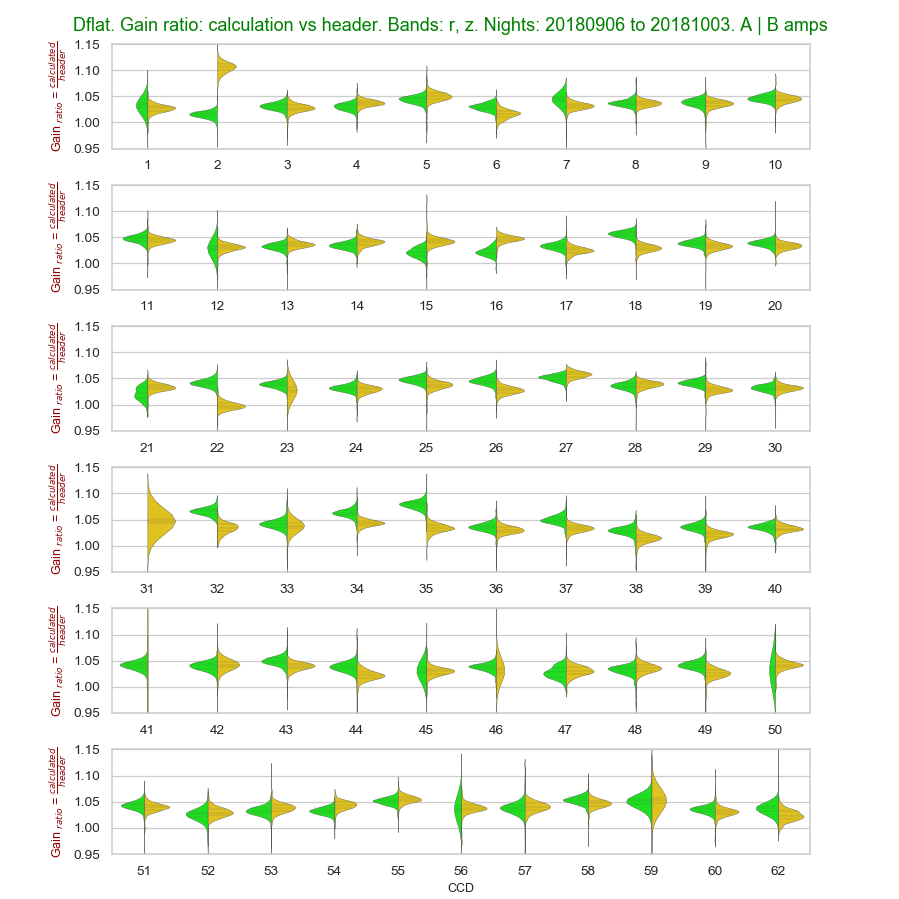

In [20]:
set1 = None
set1 = calc.loc[(calc['nite'] > 20180905)]

f, ax = plt.subplots(6, 1, figsize=(10, 10))
sns.set(style='whitegrid', palette='pastel', color_codes=True)

minorLocator = MultipleLocator(0.05)
kw1 = {
    'x': 'ccd', 
    'y': 'gain_ratio',                
    'hue': 'amp',
    'scale': 'area',
    'split': True, 
    'inner': 'quart',
    'linewidth': 0.3, 
    'palette': {'A': 'lime', 'B': 'gold'},  
}
    
plt.sca(ax[0])
sns.violinplot(data=set1.loc[set1['ccd'] <= 10], **kw1,)

plt.sca(ax[1])
sns.violinplot(data=set1.loc[(set1['ccd'] > 10) & (set1['ccd'] <= 20)], **kw1,)

plt.sca(ax[2])
sns.violinplot(data=set1.loc[(set1['ccd'] > 20) & (set1['ccd'] <= 30)], **kw1,)

plt.sca(ax[3])
sns.violinplot(data=set1.loc[(set1['ccd'] > 30) & (set1['ccd'] <= 40)], **kw1,)

plt.sca(ax[4])
sns.violinplot(data=set1.loc[(set1['ccd'] > 40) & (set1['ccd'] <= 50)], **kw1,)

plt.sca(ax[5])
sns.violinplot(data=set1.loc[(set1['ccd'] > 50)], **kw1,)

for axis in ax:
    axis.set_ylim([0.95, 1.15])
    # Remove legend
    axis.legend_.remove()
    # Decrease fontsize
    # plt.setp(axis.get_legend().get_texts(), fontsize='8') # for legend text
    # plt.setp(axis.get_legend().get_title(), fontsize='8') # for legend title
    axis.set_ylabel(r'Gain $_{ratio}$ = $\frac{calculated}{header}$', fontsize=10, color='darkred')
    # Remove axis labels
    axis.xaxis.label.set_visible(False)
    # Set minor tics
    axis.yaxis.set_major_locator(minorLocator)
    
ax[-1].xaxis.label.set_visible(True)
ax[-1].set_xlabel('CCD', fontsize=10)

# Set title
t01 = 'Dflat. Gain ratio: calculation vs header. Bands: r, z.'
t01 += ' Nights: {0} to {1}. A | B amps'.format(set1['nite'].min(), set1['nite'].max())
plt.suptitle(t01, color='green')

plt.subplots_adjust(hspace=0.35, top=0.95, bottom=0.05)

oname = 'gain_20180905t1003.pdf'
plt.savefig(oname, dpi=300, format='pdf')
#sns.despine(left=True)

CCDs showing abnormal behaviour

<IPython.core.display.Javascript object>


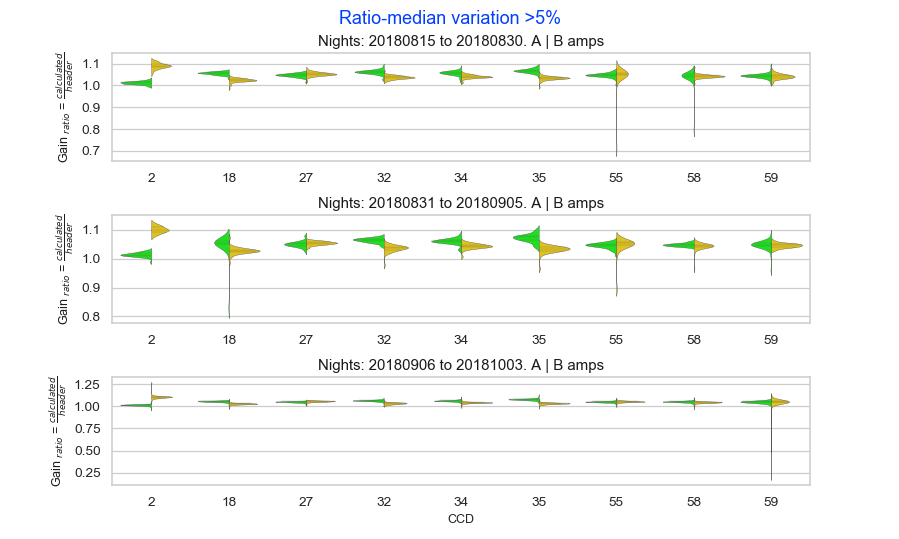

In [33]:
# ccd_abnormal = [29, 31, 41, 46, 53, 54, ]
ccd_abnormal = [2, 18, 27, 32, 34, 35, 41]
setx1 = calc.loc[calc['nite'] < 20180831]
setx2 = calc.loc[(calc['nite'] >= 20180831) & (calc['nite'] < 20180905)]
setx3 = calc.loc[calc['nite'] > 20180905]

# Subset of ccds
setx1 = setx1.loc[(setx1['ccd'] == 2) | 
                  (setx1['ccd'] == 18) |
                  (setx1['ccd'] == 27) | 
                  (setx1['ccd'] == 32) | 
                  (setx1['ccd'] == 34) | 
                  (setx1['ccd'] == 35) |
                  (setx1['ccd'] == 55) |
                  (setx1['ccd'] == 58) |
                  (setx1['ccd'] == 59) 
                 ]
setx2 = setx2.loc[(setx2['ccd'] == 2) | 
                  (setx2['ccd'] == 18) |
                  (setx2['ccd'] == 27) | 
                  (setx2['ccd'] == 32) | 
                  (setx2['ccd'] == 34) | 
                  (setx2['ccd'] == 35) |
                  (setx2['ccd'] == 55) |
                  (setx2['ccd'] == 58) |
                  (setx2['ccd'] == 59) 
                 ]
setx3 = setx3.loc[(setx3['ccd'] == 2) | 
                  (setx3['ccd'] == 18) |
                  (setx3['ccd'] == 27) | 
                  (setx3['ccd'] == 32) | 
                  (setx3['ccd'] == 34) | 
                  (setx3['ccd'] == 35) |
                  (setx3['ccd'] == 55) |
                  (setx3['ccd'] == 58) |
                  (setx3['ccd'] == 59) 
                 ]

f, ax = plt.subplots(3, 1, figsize=(10, 6))
sns.set(style='whitegrid', palette='bright', color_codes=True)

minorLocator = MultipleLocator(0.1)
kw1 = {
    'x': 'ccd', 
    'y': 'gain_ratio',                
    'hue': 'amp',
    'scale': 'area',
    'split': True, 
    'inner': 'quart',
    'linewidth': 0.3, 
    'palette': {'A': 'lime', 'B': 'gold'},  
}
    
plt.sca(ax[0])
sns.violinplot(data=setx1, **kw1,)
plt.sca(ax[1])
sns.violinplot(data=setx2, **kw1,)
plt.sca(ax[2])
sns.violinplot(data=setx3, **kw1,)

for axis in ax:
    # Remove legend
    axis.legend_.remove()
    # Decrease fontsize
    # plt.setp(axis.get_legend().get_texts(), fontsize='8') # for legend text
    # plt.setp(axis.get_legend().get_title(), fontsize='8') # for legend title
    axis.set_ylabel(r'Gain $_{ratio}$ = $\frac{calculated}{header}$', fontsize=10, color='k')
    # Remove axis labels
    axis.xaxis.label.set_visible(False)
    # Set minor tics
    axis.yaxis.set_major_locator(minorLocator)

# Last subplot
ax[-1].yaxis.set_major_locator(MultipleLocator(0.25))
    
# Set title
t01 = 'Nights: {0} to {1}. A | B amps'.format(20180815, 20180830)
ax[0].set_title(t01, color='k')
t01 = 'Nights: {0} to {1}. A | B amps'.format(20180831, 20180905)
ax[1].set_title(t01, color='k')
t01 = 'Nights: {0} to {1}. A | B amps'.format(20180906, 20181003)
ax[2].set_title(t01, color='k')

plt.suptitle('Ratio-median variation >5%', color='b')

ax[-1].xaxis.label.set_visible(True)
ax[-1].set_xlabel('CCD', fontsize=10)

plt.subplots_adjust(hspace=0.5, top=0.9, bottom=0.1)

oname = 'gain_abnormal.pdf'
plt.savefig(oname, dpi=300, format='pdf')

Only CCD 41

<IPython.core.display.Javascript object>


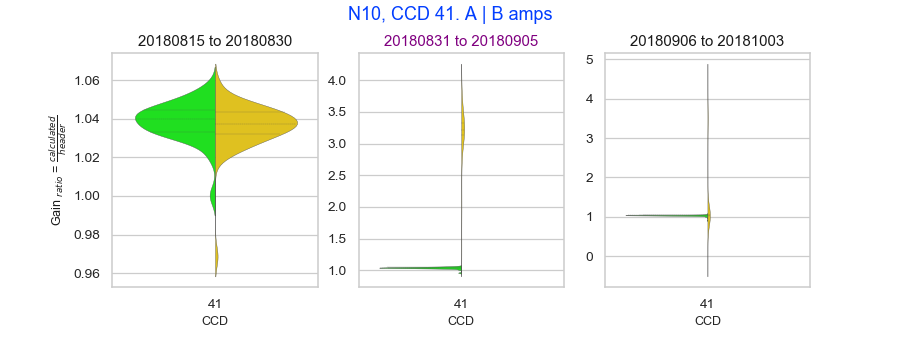

In [34]:
setx1, setx2, setx3 = None, None, None
setx1 = calc.loc[calc['nite'] < 20180831]
setx2 = calc.loc[(calc['nite'] >= 20180831) & (calc['nite'] < 20180905)]
setx3 = calc.loc[calc['nite'] > 20180905]

# Subset of ccds
setx1 = setx1.loc[(setx1['ccd'] == 41)]
setx2 = setx2.loc[(setx2['ccd'] == 41)]
setx3 = setx3.loc[(setx3['ccd'] == 41)]

f, ax = plt.subplots(1, 3, figsize=(10, 4))
sns.set(style='whitegrid', palette='bright', color_codes=True)

minorLocator = MultipleLocator(0.05)
kw1 = {
    'x': 'ccd', 
    'y': 'gain_ratio',                
    'hue': 'amp',
    'scale': 'area',
    'split': True, 
    'inner': 'quart',
    'linewidth': 0.3, 
    'palette': {'A': 'lime', 'B': 'gold'},  
}
    
plt.sca(ax[0])
sns.violinplot(data=setx1, **kw1,)
plt.sca(ax[1])
sns.violinplot(data=setx2, **kw1,)
plt.sca(ax[2])
sns.violinplot(data=setx3, **kw1,)

for axis in ax:
    # Remove legend
    axis.legend_.remove()
    # Decrease fontsize
    # plt.setp(axis.get_legend().get_texts(), fontsize='8') # for legend text
    # plt.setp(axis.get_legend().get_title(), fontsize='8') # for legend title
    axis.set_xlabel('CCD', fontsize=10)
    axis.xaxis.label.set_visible(True)
    # Set minor tics
    #axis.yaxis.set_major_locator(minorLocator)

# Remove axis labels
ax[1].yaxis.label.set_visible(False)
ax[2].yaxis.label.set_visible(False)
    
# Set title
t01 = '{0} to {1}'.format(20180815, 20180830)
ax[0].set_title(t01, color='k')
t01 = '{0} to {1}'.format(20180831, 20180905)
ax[1].set_title(t01, color='purple')
t01 = '{0} to {1}'.format(20180906, 20181003)
ax[2].set_title(t01, color='k')

plt.suptitle('N10, CCD 41. A | B amps', color='b')

ax[0].set_ylabel(r'Gain $_{ratio}$ = $\frac{calculated}{header}$', fontsize=10, color='k')
plt.subplots_adjust(hspace=0.5, top=0.85, bottom=0.2)

oname = 'gain_n10.pdf'
plt.savefig(oname, dpi=300, format='pdf')

In [ ]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(y='gain', 
                x='ccd',
                hue="gain", size="amp",
                palette="ch:r=-.2,d=.3_r",
                hue_order=calc['ccd'].unique,
                sizes=(1, 8), linewidth=0,
                data=calc, ax=ax)